In [1]:
from brainways_datamodule import BrainwaysDataModule
import matplotlib.pyplot as plt
import torch
from main import BrainwaysLightningCLI
from brainways_lightning_module import BrainwaysLightningModule
import random

In [2]:
def get_display_image(image: torch.Tensor):
    image = (image - torch.min(image)) / (torch.max(image) - torch.min(image))
    return image.squeeze().permute(1, 2, 0).numpy()

def display_samples(samples):
    if "image_a" in samples[0]:
        fig, axs = plt.subplots(10, 2, figsize=(10, 50))
    else:
        fig, axs = plt.subplots(10, 1, figsize=(10, 50))

    for i, sample in enumerate(samples):
        if "image_a" in sample:
            axs[i, 0].imshow(get_display_image(sample["image_a"]))
            axs[i, 0].set_title(f"image_a, ap={sample['ap_a']}, label={sample['label']}, atlas={sample['atlas_name']}")
            axs[i, 0].axis("off")

            axs[i, 1].imshow(get_display_image(sample["image_b"]))
            axs[i, 1].set_title(f"image_b, ap={sample['ap_b']}")
            axs[i, 1].axis("off")
        else:
            axs[i].imshow(get_display_image(sample["image"]))
            axs[i].set_title(f"image, ap={sample['ap']}")
            axs[i].axis("off")

    plt.tight_layout()
    plt.show()

In [3]:
cli = BrainwaysLightningCLI(
    BrainwaysLightningModule,
    BrainwaysDataModule,
    run=False,
    args=["--config=/home/ben/python/brm2/configs/only_allen.yml", "--data.batch_size=1", "--data.atlas_weights={'whs_sd_rat_39um':100,'allen_mouse_25um':0}"],
    parser_kwargs={"parser_mode": "omegaconf"},
)

/home/ben/miniconda3/envs/brm-dinov2/lib/python3.11/site-packages/lightning/pytorch/cli.py:520: LightningCLI's args parameter is intended to run from within Python like if it were from the command line. To prevent mistakes it is not recommended to provide both args and command line arguments, got: sys.argv[1:]=['--f=/home/ben/.local/share/jupyter/runtime/kernel-v2-10459482rPZMZW42EeV.json'], args=['--config=/home/ben/python/brm2/configs/only_allen.yml', '--data.batch_size=1', "--data.atlas_weights={'whs_sd_rat_39um':100,'allen_mouse_25um':0}"].


Bg_atlasapi: whs_sd_rat_39um version 1.0 is not the latest available (1.1). To update the atlas run in the 
terminal:
    brainglobe update -a whs_sd_rat_39um

INFO:timm.models._builder:Loading pretrained weights from Hugging Face hub (timm/efficientnet_b0.ra_in1k)
INFO:timm.models._hub:[timm/efficientnet_b0.ra_in1k] Safe alternative available for 'pytorch_model.bin' (as 'model.safetensors'). Loading weights using safetensors.
INFO:torch.distributed.nn.jit.instantiator:Created a temporary directory at /tmp/tmp5tj7jquc
INFO:torch.distributed.nn.jit.instantiator:Writing /tmp/tmp5tj7jquc/_remote_module_non_scriptable.py
INFO: Using 16bit Automatic Mixed Precision (AMP)
INFO:lightning.pytorch.utilities.rank_zero:Using 16bit Automatic Mixed Precision (AMP)
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available

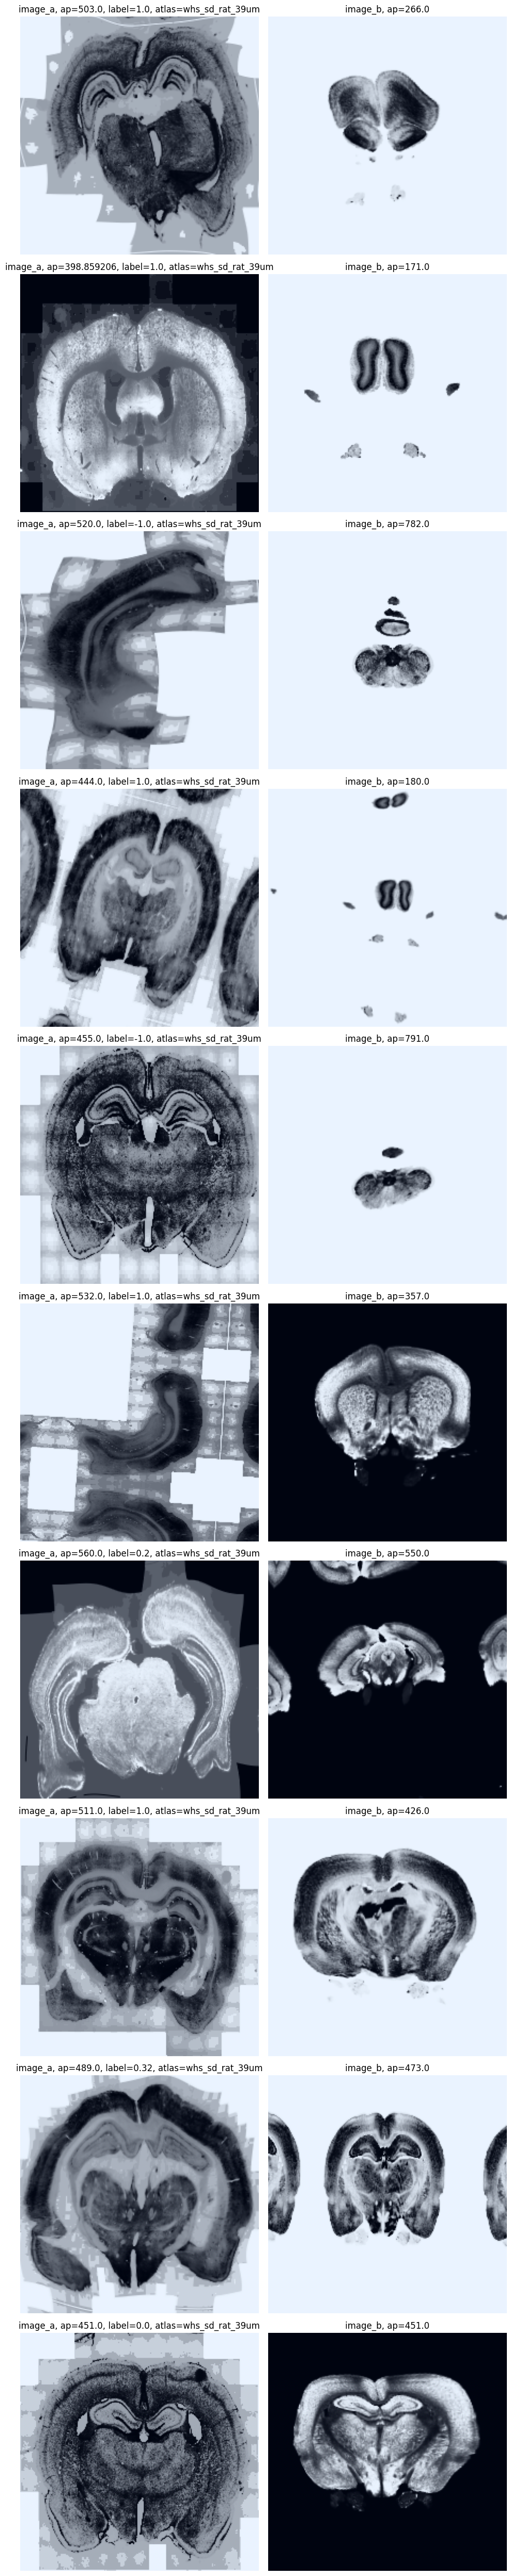

In [6]:
ds = cli.datamodule.train_dataset
samples = [next(iter(ds)) for _ in range(10)]
display_samples(samples)

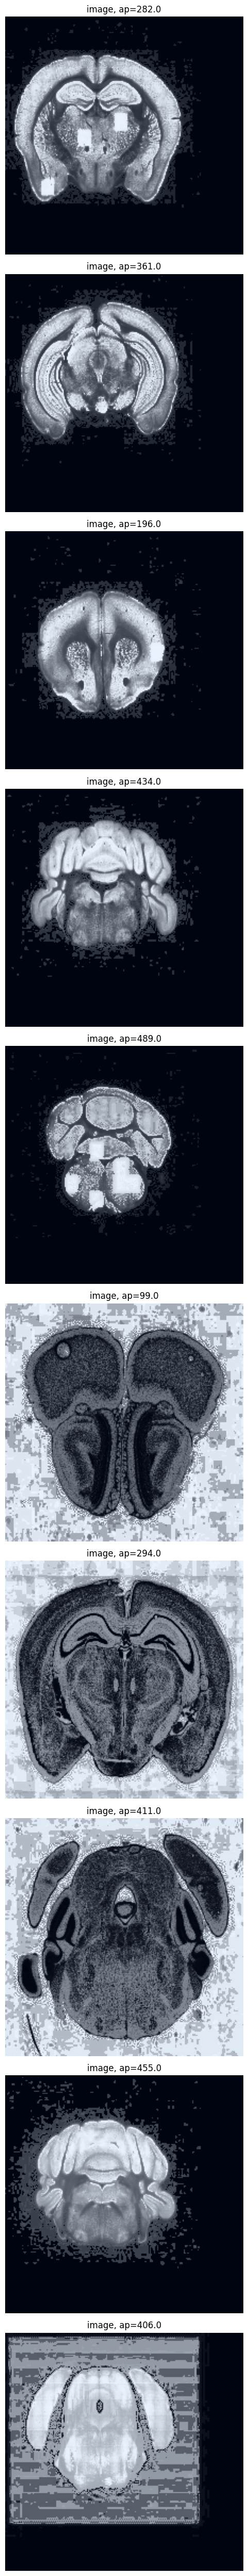

In [5]:
# samples = [next(ds_iter) for _ in range(10)]
ds = cli.datamodule.test_dataset
samples = [ds[i] for i in random.sample(range(len(ds)), 10)]
display_samples(samples)